# BIKE SHARING DATASET
### Dicoding Data Analysis Project

---
Name : Fizio Ramadhan Herman

Group : ML-20

This project analyzes a bike-sharing dataset to understand rental patterns over a one-year period. We'll explore the data to answer three main questions:

1. Weather & Seasonal Impact : Which weather situation & season has the highest/lowest number of bike rentals?
2. Peak Hours : What time of day is most popular for bike rentals?
3. Weekday vs Weekend : How do bike rental patterns differ between weekdays and weekends?

To answer these questions, we'll use data visualization and statistical analysis techniques. Our goal is to uncover insights that could be useful for managing bike-sharing systems more effectively.


## Importing libraries and dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_day = pd.read_csv('data/day.csv')
df_hours = pd.read_csv('data/hour.csv')

From these 2 dataframes, one is daily and the other is hourly.

In [3]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df_hours

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Features description:
- instant : record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Data Assesment

In [5]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


As we can see that there is no null values from both of the dataset

In [7]:
print("Duplicated data: ", df_hours.duplicated().sum())
print("Duplicated data: ", df_day.duplicated().sum())

Duplicated data:  0
Duplicated data:  0


There are also no data duplicated within these dataset

## Data Cleaning

In [8]:
df_hours = df_hours.drop(columns=['workingday'])
df_day = df_day.drop(columns=['workingday'])

drop ['workingday'] feature since it is already represented by the ['holiday'] feature

In [9]:
df_hours = df_hours.drop(columns=['instant'])
df_day = df_day.drop(columns=['instant'])

drop ['instant'] feature since it has nothing to do with the data

In [10]:
df_hours['dteday'] = pd.to_datetime(df_hours['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

Change dteday datatype from object to date

## Exploratory Data Analysis

### Weather & Seasonal Impact

In [11]:
season_rentals = df_day.groupby('season')['cnt'].sum().reset_index()
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rentals['season_name'] = season_rentals['season'].map(season_names)

/var/folders/rp/7g4bn_ws7_38ndm13jwmlm5r0000gn/T/ipykernel_15154/912718490.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=season_rentals, palette='viridis')


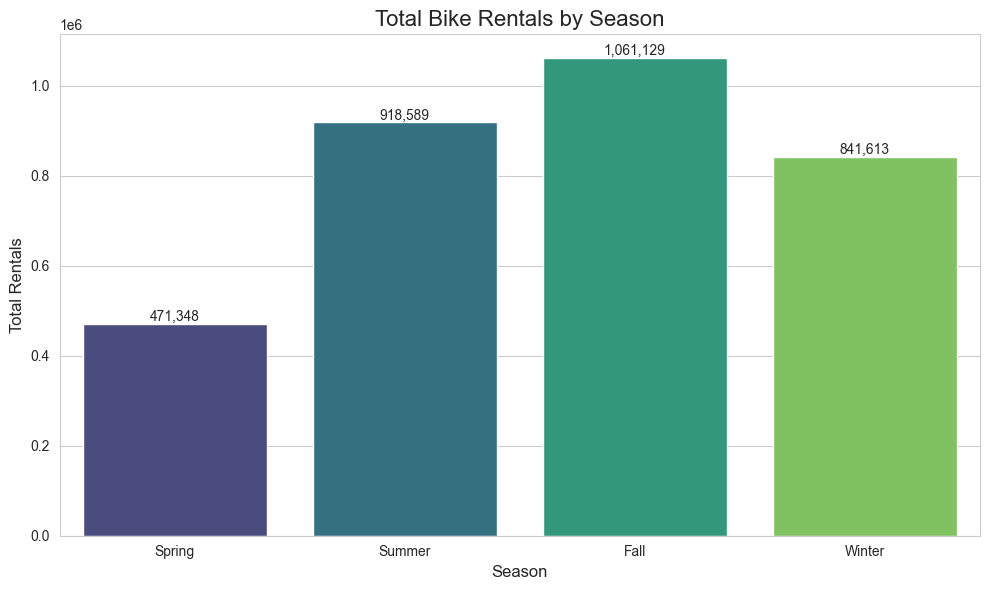

In [12]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(x='season_name', y='cnt', data=season_rentals, palette='viridis')

# Customize the plot
plt.title('Total Bike Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(season_rentals['cnt']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

We can see from the chart that fall season has the highest number of rental (1,061,029).

And on the other hand, spring season has the lowest number of rental (471,348).

In [13]:
weather_condition_rental = df_day.groupby('weathersit')['cnt'].sum().reset_index()
condition_names = {1: "Clear | Few cloud", 2: "Mist | Cloudy", 3: "Light Snow | Light Rain",
                   4: 'Heavy Rain + Ice Pallets + Thunderstorm'}
weather_condition_rental['weather_condition'] = weather_condition_rental['weathersit'].map(condition_names)

/var/folders/rp/7g4bn_ws7_38ndm13jwmlm5r0000gn/T/ipykernel_15154/747970530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='cnt', data=weather_condition_rental, palette='viridis')


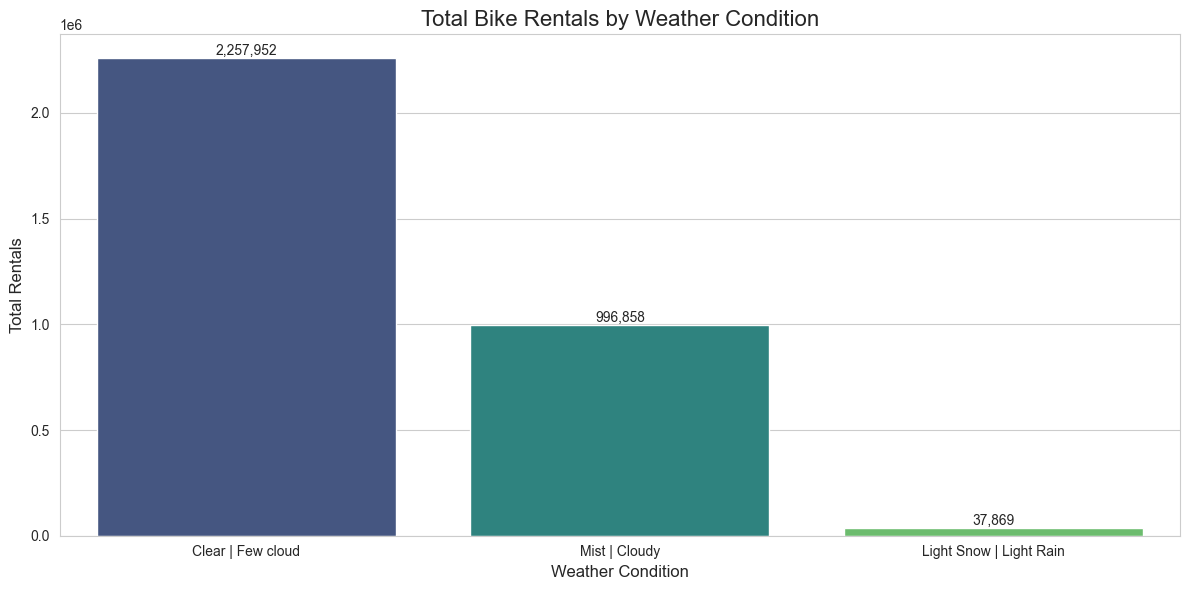

In [14]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(x='weather_condition', y='cnt', data=weather_condition_rental, palette='viridis')

# Customize the plot
plt.title('Total Bike Rentals by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(weather_condition_rental['cnt']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

We can see from the chart that people tend to rent a bike when the weather condition is clear, and very less of a people rent a bike when the weather condition has a light snow. And also none of them are renting a bike when the weather is really bad (4th category).

### Peak Hours

In [15]:
hourly_rentals = df_hours.groupby('hr')['cnt'].sum().reset_index()
hourly_rentals['period'] = hourly_rentals['hr'].apply(lambda x: 'AM' if x < 12 else 'PM')

In [16]:
am_top4 = hourly_rentals[hourly_rentals['period'] == 'AM'].nlargest(4, 'cnt')
pm_top4 = hourly_rentals[hourly_rentals['period'] == 'PM'].nlargest(4, 'cnt')

selected_hours = pd.concat([am_top4, pm_top4])
selected_hours['hour_label'] = selected_hours.apply(lambda row: f"{row['hr'] % 12 or 12} {row['period']}", axis=1)
selected_hours = selected_hours.sort_values('hr')

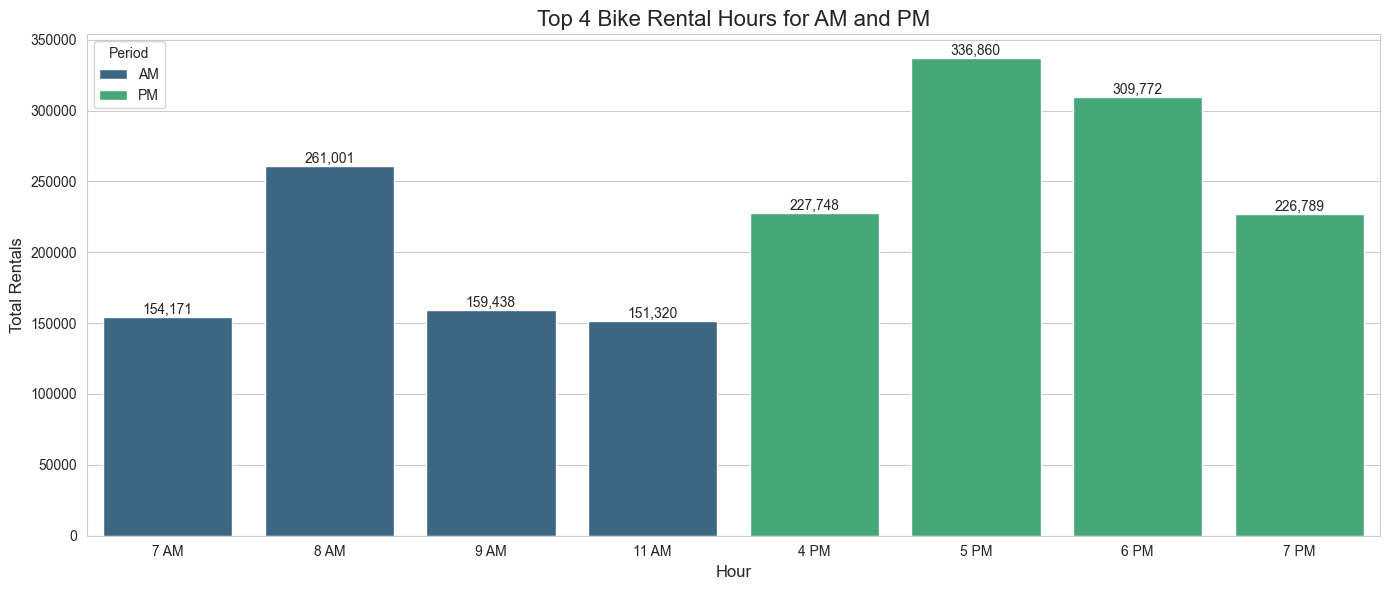

In [17]:
# Set up the plot
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Create the bar plot
sns.barplot(x='hour_label', y='cnt', hue='period', data=selected_hours, palette='viridis')

# Customize the plot
plt.title('Top 4 Bike Rental Hours for AM and PM', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(selected_hours['cnt']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Adjust legend
plt.legend(title='Period', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

The peak hours of bike renting is on 8AM (on the morning) and 5PM (on the afternoon)

### Weekday vs Weekend

In [18]:
df_day['day_type'] = df_day['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
day_type_rentals = df_day.groupby('day_type')['cnt'].mean().reset_index()

/var/folders/rp/7g4bn_ws7_38ndm13jwmlm5r0000gn/T/ipykernel_15154/2183772975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=day_type_rentals, palette='viridis')


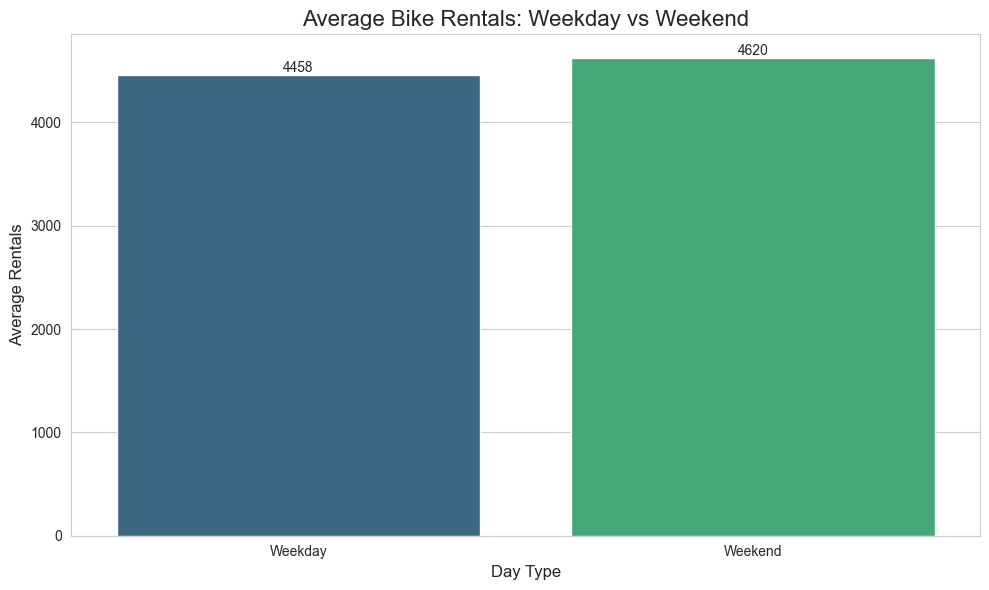

In [19]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the bar plot
sns.barplot(x='day_type', y='cnt', data=day_type_rentals, palette='viridis')

# Customize the plot
plt.title('Average Bike Rentals: Weekday vs Weekend', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(day_type_rentals['cnt']):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Also that the average of bike rental within a weekday/weekend is pretty similar, but considering a weekend is only 2/7 days, this conclude that the number of bike rental on the weekend is far more than on the weekday.

### Yearly Trend

In [22]:
daily_rentals = df_day.groupby('dteday')['cnt'].sum().reset_index()

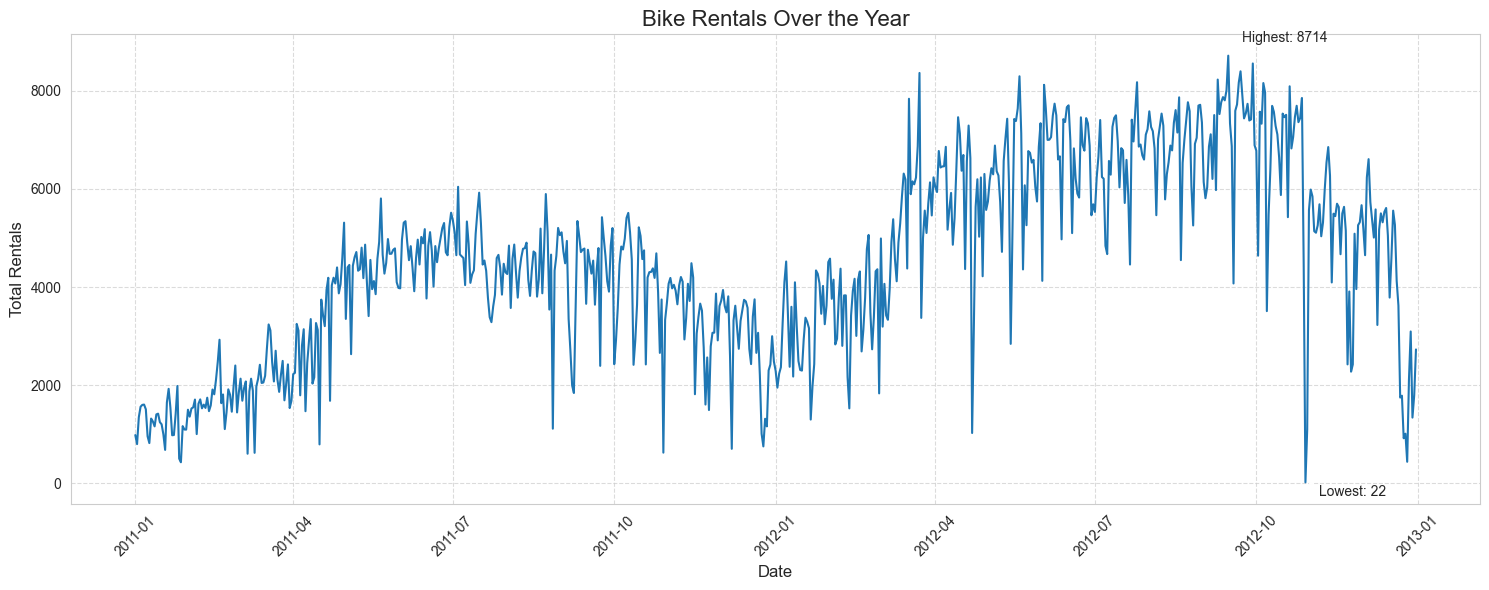

In [24]:
# Set up the plot
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

# Create the line plot
sns.lineplot(x='dteday', y='cnt', data=daily_rentals)

# Customize the plot
plt.title('Bike Rentals Over the Year', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate highest and lowest points
max_point = daily_rentals.loc[daily_rentals['cnt'].idxmax()]
min_point = daily_rentals.loc[daily_rentals['cnt'].idxmin()]

plt.annotate(f'Highest: {max_point["cnt"]}',
             xy=(max_point['dteday'], max_point['cnt']),
             xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

plt.annotate(f'Lowest: {min_point["cnt"]}',
             xy=(min_point['dteday'], min_point['cnt']),
             xytext=(10, -10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

# Show the plot
plt.tight_layout()
plt.show()

We can see a trend where the bike rental tend to lower on each early years (these might come from the weather issues).

## Conclusion

Based on our analysis of the bike-sharing data, we can draw several key conclusions about usage patterns and the factors that influence bike rentals:

**Seasonal Impact:**

Fall emerges as the most popular season for bike rentals, with more than double the rentals of spring, the least popular season. This suggests a strong seasonal influence on bike-sharing usage.


**Weather Sensitivity:**


Weather conditions play a crucial role in rental decisions. Clear weather significantly boosts rentals, while adverse conditions like snow or heavy rain drastically reduce usage. This highlights the importance of weather forecasting in predicting and managing bike availability.


**Daily Usage Patterns:**


Two distinct peak rental periods are observed at 8 AM and 5 PM, coinciding with typical commute times. This pattern indicates that a significant portion of users likely use the bike-sharing service for commuting to and from work or school.


**Weekend vs. Weekday Usage:**


While the average daily rentals are similar for weekdays and weekends, the fact that weekends account for only 2/7 of the week implies a much higher rental rate on weekends. This suggests different usage patterns and purposes between weekdays (likely commuting) and weekends (likely leisure).


**Yearly Trends:**


The observation of lower rental numbers at the beginning of each year, possibly due to weather issues, points to consistent yearly cycles in the bike-sharing system usage.

